In [21]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [22]:
tracks = pd.read_csv('C:/Users/lukew/Documents/Year 3/AI/COM6033_Project_Assignment/tracks_features.csv')

print(tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [23]:
tracks.shape

(1204025, 24)

There are 1,204,025 different song values with 24 columns

In [24]:
tracks.head()

id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2            1      True   
2  ['2d0hyoQ5ynDBnkvAbJKORj']             3            1     False   
3  ['2d0hyoQ5ynDBnkvAbJKORj']             4            1      True   
4  ['2d0hyoQ5ynDBnkvAbJKORj']             5            1     False   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.470  ...       0.0727       0.02610          0.000011    0.3560   
1         0.599  ...       0.1880       0.01290          0.000071    0.1550   
2         0.315  ...       0.4830       0.02340          0.000002    0.1220   
3         0.440  ...       0.2370       0.16300          0.000004    0.1210   
4         0.426  ...       0.0701       0.00162          0.105000    0.0789   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.503  117.906       210133             4.0  1999    1999-11-02  
1    0.489  103.680       206200             4.0  1999    1999-11-02  
2    0.370  149.749       298893             4.0  1999    1999-11-02  
3    0.574   96.752       213640             4.0  1999    1999-11-02  
4    0.539  127.059       205600             4.0  1999    1999-11-02  

[5 rows x 24 columns]

In [25]:
tracks.describe()

track_number   disc_number  danceability        energy           key  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean   7.656352e+00  1.055906e+00  4.930565e-01  5.095363e-01  5.194151e+00   
std    5.994977e+00  2.953752e-01  1.896694e-01  2.946839e-01  3.536731e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  1.000000e+00  3.560000e-01  2.520000e-01  2.000000e+00   
50%    7.000000e+00  1.000000e+00  5.010000e-01  5.240000e-01  5.000000e+00   
75%    1.000000e+01  1.000000e+00  6.330000e-01  7.660000e-01  8.000000e+00   
max    5.000000e+01  1.300000e+01  1.000000e+00  1.000000e+00  1.100000e+01   

           loudness          mode   speechiness  acousticness  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean  -1.180870e+01  6.714595e-01  8.438219e-02  4.467511e-01   
std    6.982132e+00  4.696827e-01  1.159914e-01  3.852014e-01   
min   -6.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%   -1.525400e+01  0.000000e+00  3.510000e-02  3.760000e-02   
50%   -9.791000e+00  1.000000e+00  4.460000e-02  3.890000e-01   
75%   -6.717000e+00  1.000000e+00  7.230000e-02  8.610000e-01   
max    7.234000e+00  1.000000e+00  9.690000e-01  9.960000e-01   

       instrumentalness      liveness       valence         tempo  \
count      1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean       2.828605e-01  2.015994e-01  4.279866e-01  1.176344e+02   
std        3.762844e-01  1.804591e-01  2.704846e-01  3.093705e+01   
min        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        7.600000e-06  9.680000e-02  1.910000e-01  9.405400e+01   
50%        8.080000e-03  1.250000e-01  4.030000e-01  1.167260e+02   
75%        7.190000e-01  2.450000e-01  6.440000e-01  1.370460e+02   
max        1.000000e+00  1.000000e+00  1.000000e+00  2.489340e+02   

        duration_ms  time_signature          year  
count  1.204025e+06    1.204025e+06  1.204025e+06  
mean   2.488399e+05    3.832494e+00  2.007328e+03  
std    1.622104e+05    5.611826e-01  1.210117e+01  
min    1.000000e+03    0.000000e+00  0.000000e+00  
25%    1.740900e+05    4.000000e+00  2.002000e+03  
50%    2.243390e+05    4.000000e+00  2.009000e+03  
75%    2.858400e+05    4.000000e+00  2.015000e+03  
max    6.061090e+06    5.000000e+00  2.020000e+03

In [26]:
tracks.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [27]:
tracks.isnull().sum()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

In [28]:
tracks[tracks.isnull().any(axis=1)]

id                                   name  \
387109   7r3l7R0Ob1XcRk6woND7It                                    NaN   
869543   0Ii9PaRffU4y8Tg1qMfV92                                    NaN   
1018344  5dQ6x9vR5gaxIQFAqFTGhN                                    NaN   
1018345  44DdlS9pHh9FPnd8Kl6P6u                                 Modest   
1018346  0e1GhxlLVzjKC2OMJR4xgO                               Paradise   
1018347  4ZF0yCc8yqid53tv9pCgm5                    Spencer Adventure 2   
1018348  64mmh0EoR0n5ROKQZZB5hT                    Plymouth Simulation   
1018349  51IvHGlNqG8jIEEDiJuJyZ  Driving Directly Into A Concrete Wall   
1018350  52rpjws4EuaZcsKcNN9m25                             Regression   
1018351  6pe1T2thmWds9hPq67Xv74                             Thos Moser   
1018352  1vmjBSwcMjxvVH22BTu6X9                              Faking It   
1018353  41kkDetaeTbWYAcEA6L9zs                        False Awakening   
1018354  3JoIniy7mdJG7QeyrDTT7u                               Delusion   

                       album                album_id  \
387109   Distort Neural Unit  490Mh7XZ2RMAdUFLyIeIjk   
869543           Hard to Hit  15nI3HMMle3zSsrVNUjdRM   
1018344                  NaN  0FuahJaNlb2xX87G54NSLj   
1018345                  NaN  0FuahJaNlb2xX87G54NSLj   
1018346                  NaN  0FuahJaNlb2xX87G54NSLj   
1018347                  NaN  0FuahJaNlb2xX87G54NSLj   
1018348                  NaN  0FuahJaNlb2xX87G54NSLj   
1018349                  NaN  0FuahJaNlb2xX87G54NSLj   
1018350                  NaN  0FuahJaNlb2xX87G54NSLj   
1018351                  NaN  0FuahJaNlb2xX87G54NSLj   
1018352                  NaN  0FuahJaNlb2xX87G54NSLj   
1018353                  NaN  0FuahJaNlb2xX87G54NSLj   
1018354                  NaN  0FuahJaNlb2xX87G54NSLj   

                                         artists  \
387109                              ['K-Bereit']   
869543   ['Big Mike', 'Yukmouth', "Tre'mendous"]   
1018344                                 ['Gupi']   
1018345                                 ['Gupi']   
1018346                                 ['Gupi']   
1018347                                 ['Gupi']   
1018348                                 ['Gupi']   
1018349                                 ['Gupi']   
1018350                                 ['Gupi']   
1018351        ['Gupi', 'Fraxiom', 'food house']   
1018352                                 ['Gupi']   
1018353                                 ['Gupi']   
1018354                                 ['Gupi']   

                                                artist_ids  track_number  \
387109                          ['0AlkK3VjSA5wwDVO382B0y']             1   
869543   ['2NeBwEmM7I71IsGl1y6FG0', '0ndMofuAPmTktjONZv...            19   
1018344                         ['3YOvdmjSEwOqRAJ0ttfwCx']             1   
1018345                         ['3YOvdmjSEwOqRAJ0ttfwCx']             2   
1018346                         ['3YOvdmjSEwOqRAJ0ttfwCx']             3   
1018347                         ['3YOvdmjSEwOqRAJ0ttfwCx']             4   
1018348                         ['3YOvdmjSEwOqRAJ0ttfwCx']             5   
1018349                         ['3YOvdmjSEwOqRAJ0ttfwCx']             6   
1018350                         ['3YOvdmjSEwOqRAJ0ttfwCx']             7   
1018351  ['3YOvdmjSEwOqRAJ0ttfwCx', '04Y5zXsFqYRzDr6tMX...             8   
1018352                         ['3YOvdmjSEwOqRAJ0ttfwCx']             9   
1018353                         ['3YOvdmjSEwOqRAJ0ttfwCx']            10   
1018354                         ['3YOvdmjSEwOqRAJ0ttfwCx']            11   

         disc_number  explicit  danceability  ...  speechiness  acousticness  \
387109             1     False         0.581  ...       0.0353       0.00114   
869543             1      True         0.890  ...       0.2590       0.00243   
1018344            1     False         0.630  ...       0.0637       0.09820   
1018345            1     False         0.729  ...       0.0503       0.04300   
1018346      

In [29]:
tracks.loc[tracks['id'] == '7r3l7R0Ob1XcRk6woND7It', 'name'] = 'None'

In [30]:
tracks['name'].fillna('None', inplace=True)

In [31]:
tracks['album'].fillna('None', inplace=True)

In [32]:
tracks[tracks.isnull().any(axis=1)]

Empty DataFrame
Columns: [id, name, album, album_id, artists, artist_ids, track_number, disc_number, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, year, release_date]
Index: []

[0 rows x 24 columns]

In [33]:
#Drop columns 'track_number', 'disc_number'
tracks.drop(['track_number', 'disc_number'], axis=1, inplace=True)

In [34]:
tracks.head()

id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  explicit  danceability  energy  key  ...  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']     False         0.470   0.978    7  ...   
1  ['2d0hyoQ5ynDBnkvAbJKORj']      True         0.599   0.957   11  ...   
2  ['2d0hyoQ5ynDBnkvAbJKORj']     False         0.315   0.970    7  ...   
3  ['2d0hyoQ5ynDBnkvAbJKORj']      True         0.440   0.967   11  ...   
4  ['2d0hyoQ5ynDBnkvAbJKORj']     False         0.426   0.929    2  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0727       0.02610          0.000011    0.3560    0.503  117.906   
1       0.1880       0.01290          0.000071    0.1550    0.489  103.680   
2       0.4830       0.02340          0.000002    0.1220    0.370  149.749   
3       0.2370       0.16300          0.000004    0.1210    0.574   96.752   
4       0.0701       0.00162          0.105000    0.0789    0.539  127.059   

   duration_ms  time_signature  year  release_date  
0       210133             4.0  1999    1999-11-02  
1       206200             4.0  1999    1999-11-02  
2       298893             4.0  1999    1999-11-02  
3       213640             4.0  1999    1999-11-02  
4       205600             4.0  1999    1999-11-02  

[5 rows x 22 columns]

# Initial Problem Statement

Designing a Music Recommendation App utilising Spotify dataset

This should be achieved by analysing the characteristics of a song and plotting against marginalised values to showcase what songs are similar, and hence recommended to the user if the correlation of the songs are close.

In [35]:
#Sort tracks by year ascending
tracks.sort_values('year', ascending=True, inplace=True)
tracks.drop(tracks[tracks['album'] == 'Optimism 2'].index, inplace=True) #Invalid songs
tracks.head(11)


id                    name          album  \
459984  1XEbjKZygiDllK5WpEB73O            Story Teller      Al-Jadida   
459983  4SNCi2xa3dkM0HPTQ1AFBP  When The Lights Go Out      Al-Jadida   
459986  6BeB08lGiB6zd8Fn7BBhb1                   Nadim      Al-Jadida   
459987  1WRapjF1HuE2rXUVBGKXXt            Wishing Well      Al-Jadida   
459985  5V4pmHLdq0fhEw5DjkaW2w     Ornette Never Sleps      Al-Jadida   
459981  6QqZn286ICbbhTjNBPlgNY                  Nashwa      Al-Jadida   
459982  5Mw5YkQkHuGqYQL5XMrUOI   An Evening With Jerry      Al-Jadida   
459980  4DZ63H1bRMmiTcXiQhERxv                 Catania      Al-Jadida   
450071  3xPatAieFSuGIuQfHMDvSw           Arabian Waltz  Arabian Waltz   
450072  5vpx0WtYVtKOFu4V65NkUi  Dreams Of A Dying City  Arabian Waltz   
450076  6PzeE7vvynVguz04STK6RL          The Pain After  Arabian Waltz   

                      album_id                artists  \
459984  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459983  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459986  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459987  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459985  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459981  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459982  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
459980  2T6FKoeG7EXR0WAsFyXbSq  ['Rabih Abou-Khalil']   
450071  1ggHQJ48NFfYhGu6VznK8K  ['Rabih Abou-Khalil']   
450072  1ggHQJ48NFfYhGu6VznK8K  ['Rabih Abou-Khalil']   
450076  1ggHQJ48NFfYhGu6VznK8K  ['Rabih Abou-Khalil']   

                        artist_ids  explicit  danceability  energy  key  ...  \
459984  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.595  0.3180    1  ...   
459983  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.414  0.1620    1  ...   
459986  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.474  0.3690    2  ...   
459987  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.521  0.2620    2  ...   
459985  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.470  0.4980    1  ...   
459981  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.436  0.3010    7  ...   
459982  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.511  0.5490    0  ...   
459980  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.465  0.4230    7  ...   
450071  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.533  0.3760    2  ...   
450072  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.476  0.1640    7  ...   
450076  ['7cM9Y2LNnnmmqivaEuH8vT']     False         0.291  0.0157    0  ...   

        speechiness  acousticness  instrumentalness  liveness  valence  \
459984       0.0458         0.537             0.658    0.3540   0.3370   
459983       0.0602         0.826             0.880    0.1180   0.0783   
459986       0.0532         0.401             0.561    0.0785   0.3010   
459987       0.0594         0.828             0.792    0.1040   0.2420   
459985       0.0569         0.593             0.914    0.1050   0.8140   
459981       0.0683         0.802             0.758    0.1070   0.1580   
459982       0.0350         0.211             0.550    0.1900   0.2530   
459980       0.0742         0.414             0.089    0.0936   0.3790   
450071       0.0576         0.875             0.859    0.0887   0.8350   
450072       0.0334         0.843             0.893    0.1060   0.5710   
450076       0.0477         0.956             0.939    0.1460   0.0959   

          tempo  duration_ms  time_signature  year  release_date  
459984  109.885       532173             4.0  1900    1900-01-01  
459983  154.842       433960             4.0  1900    1900-01-01  
459986  162.807       513000             4.0  1900    1900-01-01  
459987  127.288       325000             4.0  1900    1900-01-01  
459985  158.412       243867             3.0  1900    1900-01-01  
459981  171.006       578000             5.0  1900    1900-01-01  
459982  144.884       423000             4.0  1900    1900-01-01  
459980  163.939       465000             5.0  1900    1900-01-01  
450071  115.7

In [36]:
#Cleaning data for better analysis
tracks.drop(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids', 'explicit', 'release_date', 'time_signature'], axis=1, inplace=True)
tracks.head()


danceability  energy  key  loudness  mode  speechiness  acousticness  \
459984         0.595   0.318    1   -15.913     1       0.0458         0.537   
459983         0.414   0.162    1   -21.256     1       0.0602         0.826   
459986         0.474   0.369    2   -13.984     1       0.0532         0.401   
459987         0.521   0.262    2   -21.560     0       0.0594         0.828   
459985         0.470   0.498    1   -17.283     1       0.0569         0.593   

        instrumentalness  liveness  valence    tempo  duration_ms  year  
459984             0.658    0.3540   0.3370  109.885       532173  1900  
459983             0.880    0.1180   0.0783  154.842       433960  1900  
459986             0.561    0.0785   0.3010  162.807       513000  1900  
459987             0.792    0.1040   0.2420  127.288       325000  1900  
459985             0.914    0.1050   0.8140  158.412       243867  1900

In [37]:
#Saving cleaned data for analysis
tracks.to_csv('C:/Users/lukew/Documents/Year 3/AI/COM6033_Project_Assignment/tracks_by_year.csv')

In [38]:
year_tracks = pd.read_csv('C:/Users/lukew/Documents/Year 3/AI/COM6033_Project_Assignment/tracks_by_year.csv')

## Music over time
Analysing how music has changed over time can help showcase trends in how music has been developed. This can boost the recommendation algorithm if there are significant trends by year.

<Axes: xlabel='count', ylabel='decade'>

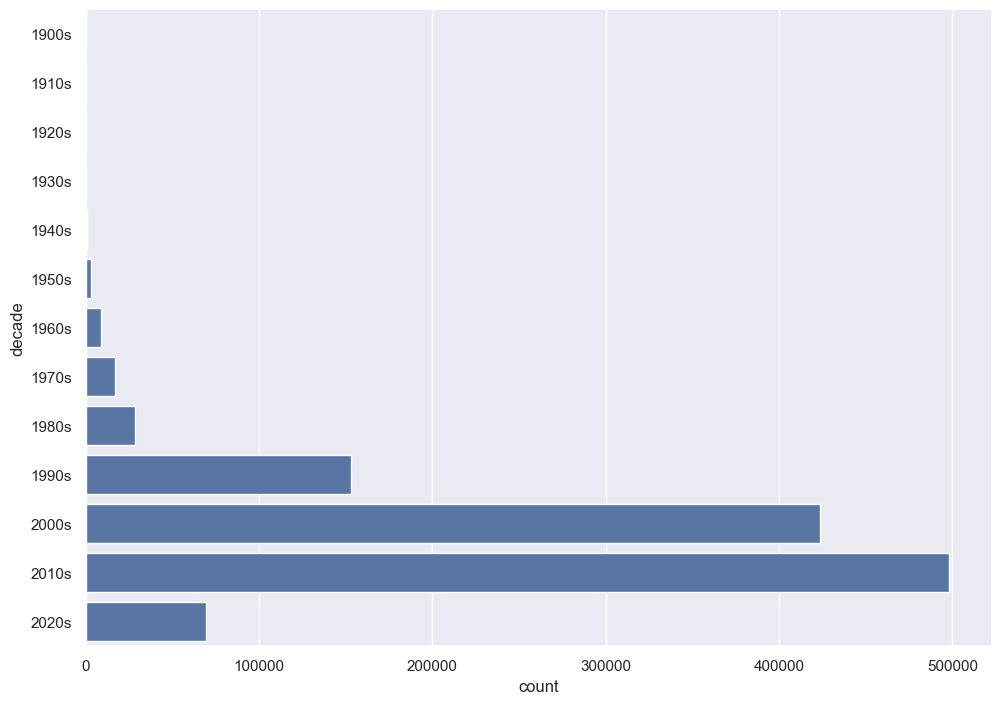

In [39]:
def get_decade(year):
    decade_start = int(year/10) * 10
    decade = '{}s'.format(decade_start)
    return decade

year_tracks['decade'] = year_tracks['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(year_tracks['decade'])

This shows that the vast majority of the songs in this dataset are from the 2010s with almost half the dataset. Data from this set may be bias toward trends and characteristics of songs created in the 2010s.

In [40]:
#Cleaning data for better analysis
#Drop decade
year_tracks.drop(['decade'], axis=1, inplace=True)
#drop unnamed: 0
year_tracks.drop(['Unnamed: 0'], axis=1, inplace=True)

In [41]:


#combine all the tracks with the same year together into one record, averaging the values for each column

year_tracks = year_tracks.groupby('year', as_index=False).mean()
year_tracks.head()

year  danceability    energy       key   loudness      mode  speechiness  \
0  1900      0.483857  0.282193  3.214286 -18.077786  0.785714     0.051693   
1  1908      0.604105  0.473695  4.526316 -15.401263  0.789474     0.076395   
2  1909      0.617560  0.484800  5.040000 -12.401080  0.760000     0.081800   
3  1917      0.506942  0.253687  5.096154 -16.892827  0.615385     0.074713   
4  1920      0.562600  0.209664  4.520000 -12.686920  0.720000     0.075524   

   acousticness  instrumentalness  liveness   valence       tempo  \
0      0.713071          0.736929  0.129264  0.422157  128.728571   
1      0.410932          0.007279  0.187263  0.657000  131.799737   
2      0.918880          0.170896  0.213696  0.823880  111.968640   
3      0.810928          0.364500  0.233617  0.480892  118.500192   
4      0.994000          0.185196  0.351440  0.620240  110.697080   

     duration_ms  
0  500062.000000  
1  226203.473684  
2  175359.440000  
3  259703.826923  
4  180252.800000

In [42]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_tracks, x='year', y=sound_features)
fig.show()

Since the data is more favoured toward the 2000s+, the data smooths off since there is more data to generate even results.

Older music trends toward favouring acousticness, valence and danceability while neglecting energy and varying instrumentalness. Newer music trends toward energy, danceability, while acousticness is less. Liveness is about the same across the board apart from a spike in trends around the 1940s but lack of data might be affecting results. 

This graph indicates that there are relationships and trends in music throughout the decades, so designing part of the recommendation algorithm that takes the year the songs were made would be a sufficient parameter which could yield correct results.

## Data Analysis by 

In [43]:
#Make a heat map for correlation
corr = year_tracks.corr()
fig = px.imshow(corr)
fig.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = tracks.select_dtypes(np.number)
cluster_pipeline.fit(X)
tracks['cluster'] = cluster_pipeline.predict(X)

  File "c:\Users\lukew\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [45]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
year_embedding = tsne_pipeline.fit_transform(X)
projection = pd.Dataframe(columns=['x', 'y'], data=year_embedding)
projection['title'] = tracks['name']
projection['cluster'] = tracks['cluster']
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1204015 samples in 12.201s...
[t-SNE] Computed neighbors for 1204015 samples in 18378.786s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1204015
[t-SNE] Computed conditional probabilities for sample 2000 / 1204015
[t-SNE] Computed conditional probabilities for sample 3000 / 1204015
[t-SNE] Computed conditional probabilities for sample 4000 / 1204015
[t-SNE] Computed conditional probabilities for sample 5000 / 1204015
[t-SNE] Computed conditional probabilities for sample 6000 / 1204015
[t-SNE] Computed conditional probabilities for sample 7000 / 1204015
[t-SNE] Computed conditional probabilities for sample 8000 / 1204015
[t-SNE] Computed conditional probabilities for sample 9000 / 1204015
[t-SNE] Computed conditional probabilities for sample 10000 / 1204015
[t-SNE] Computed conditional probabilities for sample 11000 / 1204015
[t-SNE] Computed conditional probabilities for sample 12000 / 1204015
[t-SNE] Computed 

KeyboardInterrupt: 

Too large dataset, time to complete ETA: 200 days minimum

Pivotting to the new version, continuing on project_assignment_pivot.ipynb